This notebook serves as a demonstration of the exploratory data analysis (EDA) pipeline.

The main tasks of this notebook are:
1. To **illustrate the structure** of a typical EDA process on real-world data (here: the [Olist e-commerce dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce));
2. To **demonstrate an example of using the tools and utility functions** I will be writing to automate repetitive EDA tasks over time.

In [1]:
import pandas as pd
import json
import sys
from pathlib import Path
from scipy.stats import mode
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




project_root = Path.cwd().parent
sys.path.append(str(project_root))
config_path = project_root / "config.json"
with open(config_path, "r") as f:
    config = json.load(f)
data_path = config['olist_data_path']

# Steps of EDA:
## 1. Load and initial inspection

In [2]:
df = pd.read_csv(f"{data_path}/olist_products_dataset.csv")
df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [3]:
df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


## 2. Pre-Processing of nAn values

In [5]:
df.isna().sum()
df.isna().mean() # Percentage of nAn-values by columns

product_id                    0.000000
product_category_name         0.018512
product_name_lenght           0.018512
product_description_lenght    0.018512
product_photos_qty            0.018512
product_weight_g              0.000061
product_length_cm             0.000061
product_height_cm             0.000061
product_width_cm              0.000061
dtype: float64

In [6]:
median_product_description_lenght = df['product_description_lenght'].median()
mean_product_description_lenght = df['product_description_lenght'].mean()
mode_product_description_lenght = df['product_description_lenght'].mode()

In [7]:
mode_product_description_lenght
mean_product_description_lenght 
median_product_description_lenght

np.float64(595.0)

In [8]:
# The mode deviates from the mean by ~1 std, indicating a skewed distribution.
# Median is a more robust choice for filling NaNs in this field.
df.fillna({'product_description_lenght': median_product_description_lenght}, inplace=True) 

# Median imputation is also applied here for stability.
df.fillna({'product_photos_qty': df['product_photos_qty'].median()}, inplace=True)
df.fillna({'product_name_lenght': df['product_name_lenght'].median()}, inplace=True) 

In [9]:
# For this column, missing values make up < 0.01% of the dataset — we can safely drop them.
df = df.dropna(subset=['product_length_cm'], axis=0) 

In [10]:
df.isna().sum()

product_id                      0
product_category_name         609
product_name_lenght             0
product_description_lenght      0
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

## 3. Distribution Analysis

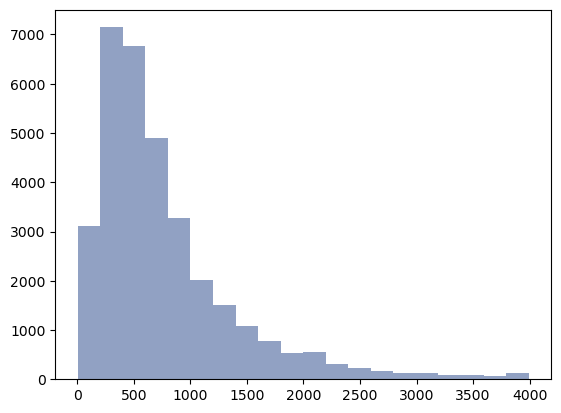

In [11]:
plt.hist(df['product_description_lenght'], bins=20, color="#6379AA", alpha=0.7)
plt.show()

## 4. Pre-processing of outliers and anomalies

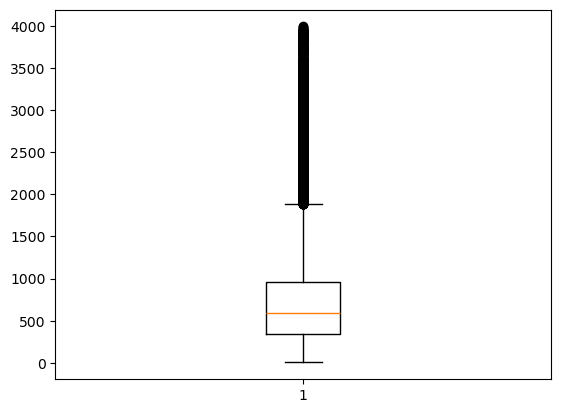

In [12]:
plt.boxplot(df['product_description_lenght'])
plt.show()

In [13]:
df['product_description_lenght'].quantile([0.95, 0.99])

0.95    2051.00
0.99    3274.52
Name: product_description_lenght, dtype: float64

## 5. Studying correlations between variables

In [14]:
df[['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].corr()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_name_lenght,1.000000,0.097349,0.130553,0.044169,0.079390,-0.016709,0.069804
product_description_lenght,0.097349,1.000000,0.111696,0.061813,0.035227,0.063304,-0.030289
product_photos_qty,0.130553,0.111696,1.000000,0.036097,0.068272,0.004993,0.026625
product_weight_g,0.044169,0.061813,0.036097,1.000000,0.476813,0.563910,0.527597
product_length_cm,0.079390,0.035227,0.068272,0.476813,1.000000,0.204889,0.542409
product_height_cm,-0.016709,0.063304,0.004993,0.563910,0.204889,1.000000,0.313491
product_width_cm,0.069804,-0.030289,0.026625,0.527597,0.542409,0.313491,1.000000


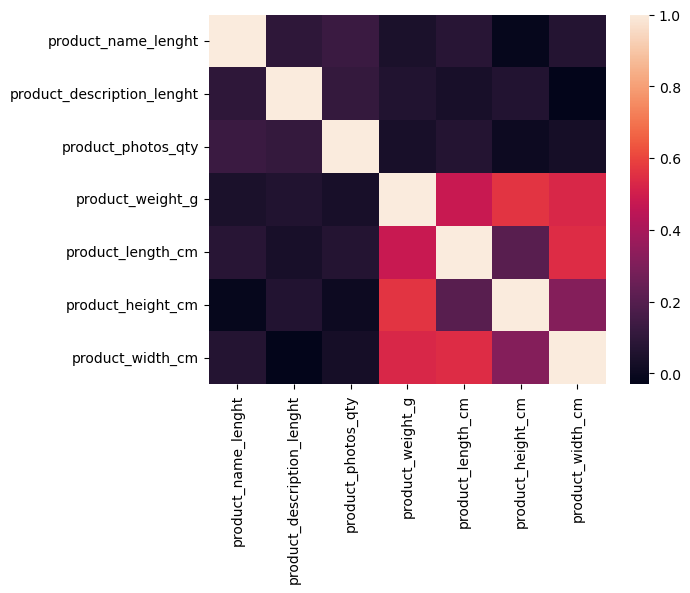

In [15]:
sns.heatmap(df[['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].corr())
plt.show()

In [16]:
df[['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].corr(method='spearman')

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_name_lenght,1.000000,0.099677,0.151706,0.098001,0.079189,-0.038731,0.067054
product_description_lenght,0.099677,1.000000,0.123496,0.107627,-0.007914,0.098492,-0.055158
product_photos_qty,0.151706,0.123496,1.000000,0.009596,0.041860,-0.036349,0.004019
product_weight_g,0.098001,0.107627,0.009596,1.000000,0.616565,0.523196,0.604952
product_length_cm,0.079189,-0.007914,0.041860,0.616565,1.000000,0.248881,0.613118
product_height_cm,-0.038731,0.098492,-0.036349,0.523196,0.248881,1.000000,0.363586
product_width_cm,0.067054,-0.055158,0.004019,0.604952,0.613118,0.363586,1.000000


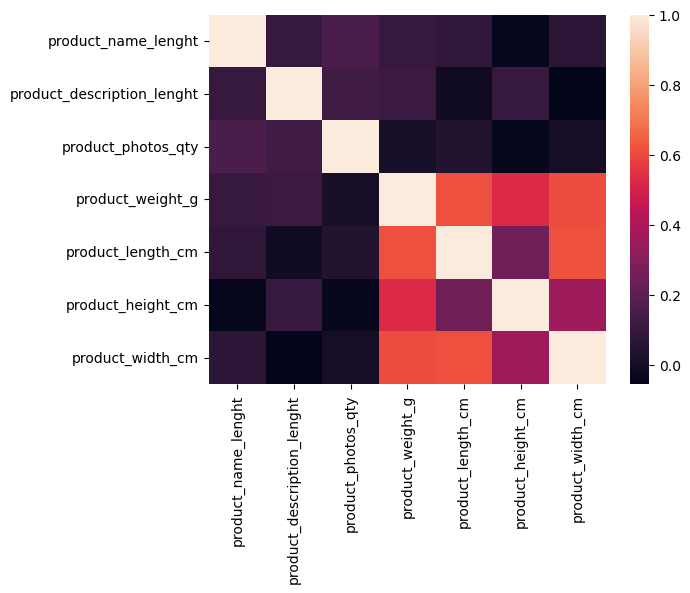

In [17]:
sns.heatmap(df[['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].corr(method='spearman'))
plt.show()

## 6. Analysis of categorical variables

In [18]:
df['product_category_name'].value_counts().head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: count, dtype: int64

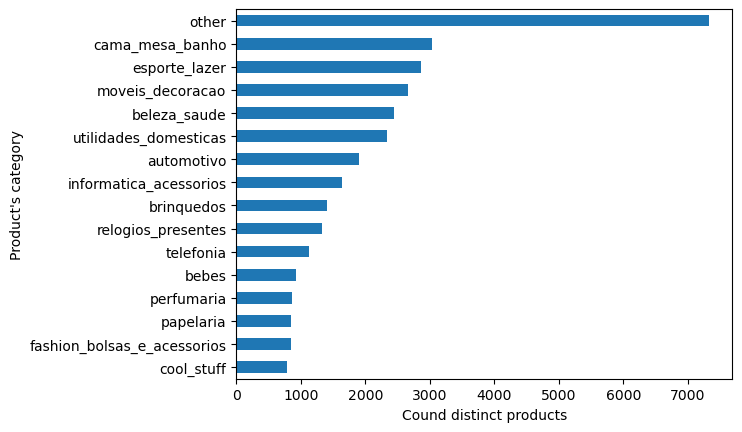

In [19]:
other = pd.Series({'other': df['product_category_name'].value_counts().iloc[15:].sum()})
other
top = df['product_category_name'].value_counts().head(15)
top = top.add(other, fill_value=0).sort_values(ascending=True)

top.plot(kind='barh')
plt.xlabel('Cound distinct products')
plt.ylabel("Product's category")
plt.show()

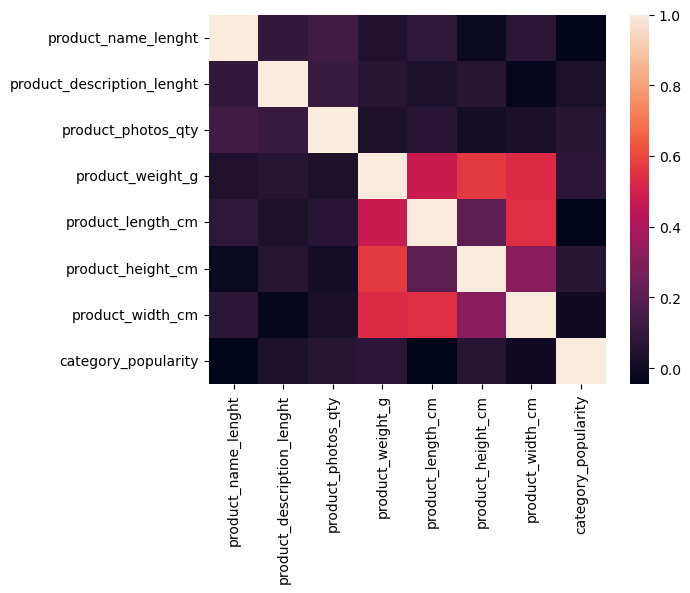

In [20]:
freq = df['product_category_name'].value_counts()
ranks = {cat: rank+1 for rank, cat in enumerate(freq.index)}
df['category_popularity'] = df['product_category_name'].map(ranks)
sns.heatmap(df[['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'category_popularity']].corr(method='pearson'))
plt.show()

## 7. Conclusion. Visualization of EDA results

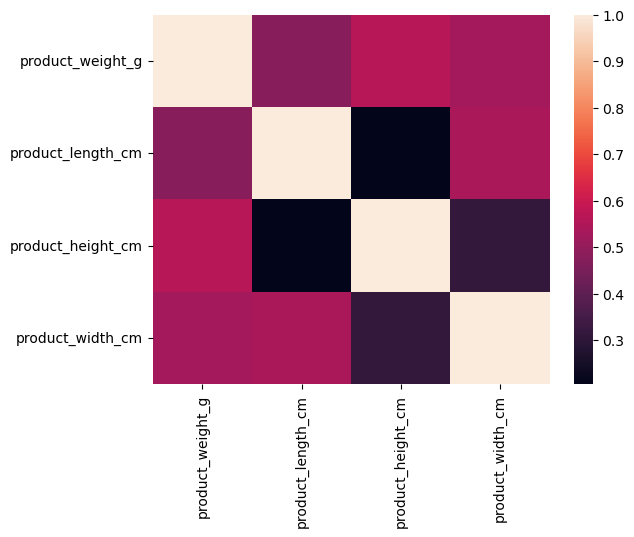

In [21]:
# Correlation between weight and product dimensions
# Surprised?
sns.heatmap(df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].corr())
plt.show()